In [1]:
import os
import pandas as pd
import datetime
import calendar
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = "/Users/Brian/Data/gdelt/raw/"
data_file = "201512_h_all_txt.zip"
freq = 'hourly'
region = 'us'

In [3]:
def get_timestamp(s):
    '''
    Translates a string that looks like "%Y-%m-%dT%H:%M:%S" and is already in gmt
    into a timestamp
    '''
    d = datetime.datetime.strptime(s, "%Y-%m-%dT%H:%M:%S")
    return calendar.timegm(d.timetuple())

In [4]:
# This returns fast if the data is already unzipped.  
# Not sure if it will work or not when we have a different archive
# with more recent but overlapping data
current_dir = os.getcwd()
os.chdir(data_dir)
os.system("unzip " + data_dir + data_file)

256

In [5]:
g = os.walk(data_dir + 'data/' + freq + '/' + region)
g.next()
x = g.next()
count = 0
limit = 250
series = []

for triple in g:
    for filename in triple[2]:
        try:
            symbol = filename.split('.')[0]
            path = '/'.join([triple[0], filename])

            df = pd.read_csv(path)
            df['timestamp'] = (df['Date'] + 'T' + df['Time']).apply(get_timestamp)
            df = df.set_index(['timestamp'])
            df[symbol] = df.Open
            series.append(df[symbol])
        except Exception:
            # It seems that this is rare.  Not part of MVP if important at all.
            # fuck it
            pass
        count += 1
        if count >= limit:
            break;
    if count >= limit:
        break;
len(series)

# TODO: Consider dropping stocks that have too many missing values

248

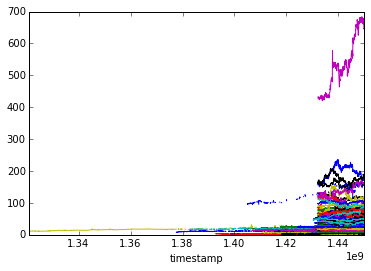

In [6]:
# Data! Horray!
df = pd.DataFrame(data=series).T
df.plot(legend=False)

In [7]:
# Deal with missing values
df = df.interpolate().fillna(0.)

In [8]:
# Looks like a small number of stocks go back considerably further than the rest.  
# Conjecture is that the archive is willing to go back further because they have fewer
# data points to keep track of.  This is bad for us because it means our data frame is full
# of NAs.  Let's take the p50 starting point as our starting point and cut off anything before
# that.  

# Quick hack
df = df[df.index > 1433000000]

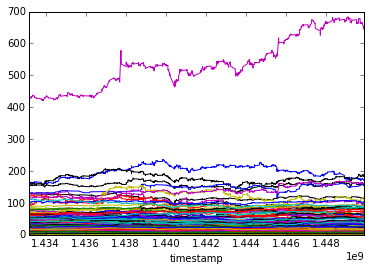

In [9]:
df.plot(legend=False)

In [10]:
X = df.values

In [11]:
X

array([[  0.    ,  42.42  ,   3.8099, ...,  23.979 ,   8.8191,  66.496 ],
       [  0.    ,  42.26  ,   3.81  , ...,  23.7035,   8.8191,  66.496 ],
       [  0.    ,  42.21  ,   3.8024, ...,  23.428 ,   8.8389,  65.355 ],
       ..., 
       [ 29.63  ,  42.62  ,   4.75  , ...,  24.49  ,   8.565 ,  76.99  ],
       [ 29.74  ,  42.69  ,   4.69  , ...,  24.33  ,   8.56  ,  76.69  ],
       [ 29.83  ,  42.45  ,   4.63  , ...,  24.    ,   8.55  ,  76.42  ]])